In [99]:
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plotting

%matplotlib inline

In [100]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

#### Exploratory Data Analysis
EDA is done to have a deeper understanding of the data and its distributions

In [127]:
dataset = pd.read_csv('sales_data.csv',encoding = 'unicode_escape')
print(dataset.head())

#get the size of the dataset
print(dataset.shape)

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [128]:
#get infor about the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
ORDERNUMBER         2823 non-null int64
QUANTITYORDERED     2823 non-null int64
PRICEEACH           2823 non-null float64
ORDERLINENUMBER     2823 non-null int64
SALES               2823 non-null float64
ORDERDATE           2823 non-null object
STATUS              2823 non-null object
QTR_ID              2823 non-null int64
MONTH_ID            2823 non-null int64
YEAR_ID             2823 non-null int64
PRODUCTLINE         2823 non-null object
MSRP                2823 non-null int64
PRODUCTCODE         2823 non-null object
CUSTOMERNAME        2823 non-null object
PHONE               2823 non-null object
ADDRESSLINE1        2823 non-null object
ADDRESSLINE2        302 non-null object
CITY                2823 non-null object
STATE               1337 non-null object
POSTALCODE          2747 non-null object
COUNTRY             2823 non-null object
TERRITORY           1749 non-null obje

#### Quick insight from the data
ADDRESSLINE1','ADDRESSLINE2','POSTALCODE', 'TERRITORY' and 'PHONE' seem to be useless columns that will not contribute meaningfully to our prediction model. These need to be dropped. We can discretize data i.e. Instead of using 'CITY' , 'STATE' can use 'COUNTRY' only. So, we can drop 'CITY' , 'STATE' also. We can regroup column 'PRODUCTCODE' by using only first three character value. We have 'CUSTOMERNAME', 'CONTACTFIRSTNAME' and 'CONTACTLASTNAME'. We can remove 'CONTACTFIRSTNAME' and 'CONTACTLASTNAME'.

In [129]:
#dropping unnecessary columns
cols_to_drop = ['ADDRESSLINE1','ADDRESSLINE2','POSTALCODE', 'TERRITORY', 'PHONE', 'CITY' , 'STATE','CONTACTFIRSTNAME', 'CONTACTLASTNAME' ]
dataset.drop(cols_to_drop,axis=1,inplace=True)

In [130]:
#regrouping product code
dataset['PRODUCTINITIAL'] = dataset['PRODUCTCODE'].str[:3] #take the first 3 characters of the product code and create a new colum 'PRODUCT INITIAL' with them
dataset.drop('PRODUCTCODE', axis=1, inplace=True)

In [131]:
#recheck coumns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 16 columns):
ORDERNUMBER        2823 non-null int64
QUANTITYORDERED    2823 non-null int64
PRICEEACH          2823 non-null float64
ORDERLINENUMBER    2823 non-null int64
SALES              2823 non-null float64
ORDERDATE          2823 non-null object
STATUS             2823 non-null object
QTR_ID             2823 non-null int64
MONTH_ID           2823 non-null int64
YEAR_ID            2823 non-null int64
PRODUCTLINE        2823 non-null object
MSRP               2823 non-null int64
CUSTOMERNAME       2823 non-null object
COUNTRY            2823 non-null object
DEALSIZE           2823 non-null object
PRODUCTINITIAL     2823 non-null object
dtypes: float64(2), int64(7), object(7)
memory usage: 353.0+ KB


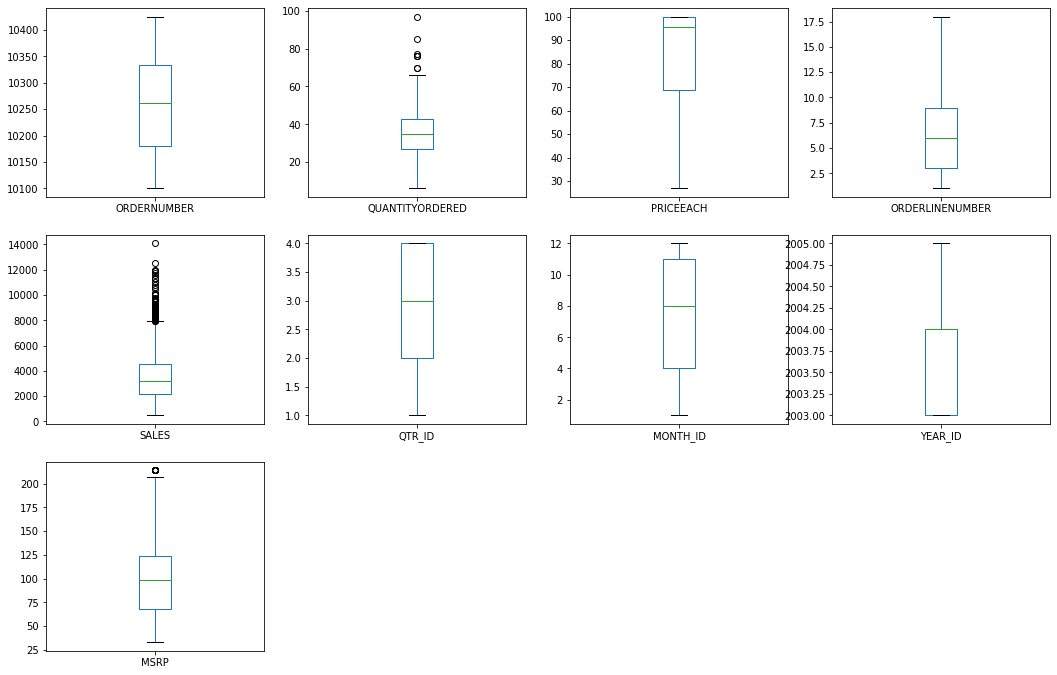

In [132]:
#Plot the data to get more insight
plt.rcParams['figure.figsize'] = [18,16]
dataset.plot(kind='box',subplots=True,layout=(4,4),sharex = False, sharey= False)
plt.show()

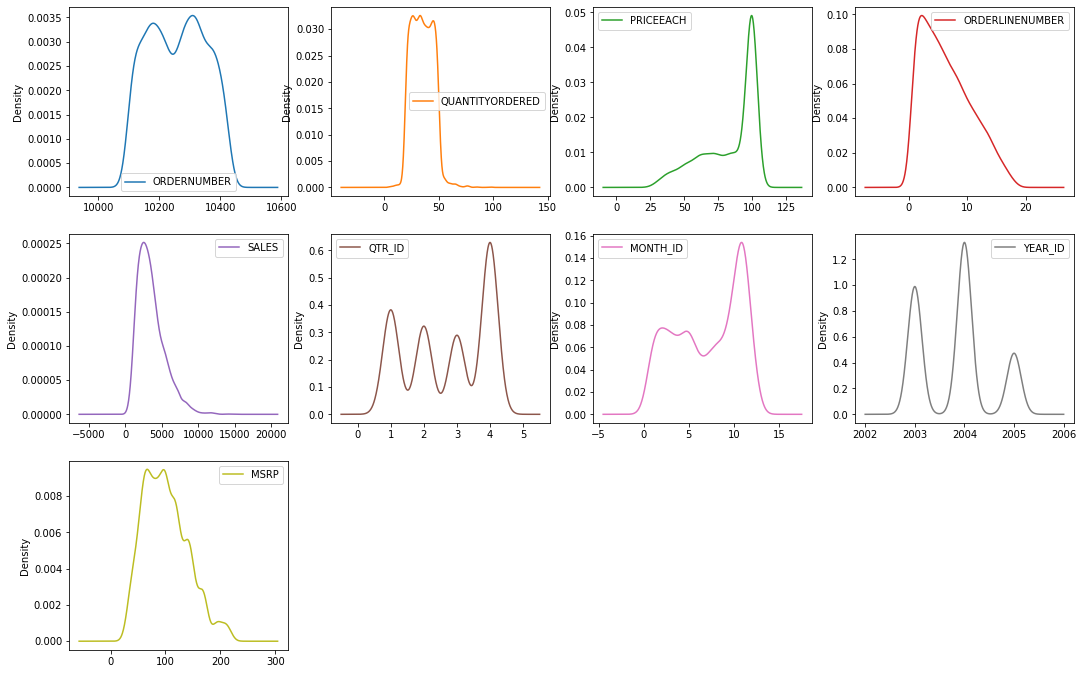

In [133]:
plt.rcParams['figure.figsize'] = [18,16]
dataset.plot(kind='density',subplots=True,layout=(4,4),sharex = False, sharey= False)
plt.show()

##### Quick insights from the data
* Most of data for year 2003,2004(YEAR_ID). 4th Quater have more sale... 4>1>2>3...
* According to data, most of sales are with in particular price range. But we have some outliers within 'SALES' and 'QUANTITYORDERED'.
* We have skewed variables like 'PRICEEACH','ORDERLINENUMBER'.
* We have variables with high variance like 'PRICEEACH','ORDERLINENUMBER' and 'MSRP'.

In [134]:
# Checking null values
dataset.isnull().sum()


ORDERNUMBER        0
QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
CUSTOMERNAME       0
COUNTRY            0
DEALSIZE           0
PRODUCTINITIAL     0
dtype: int64

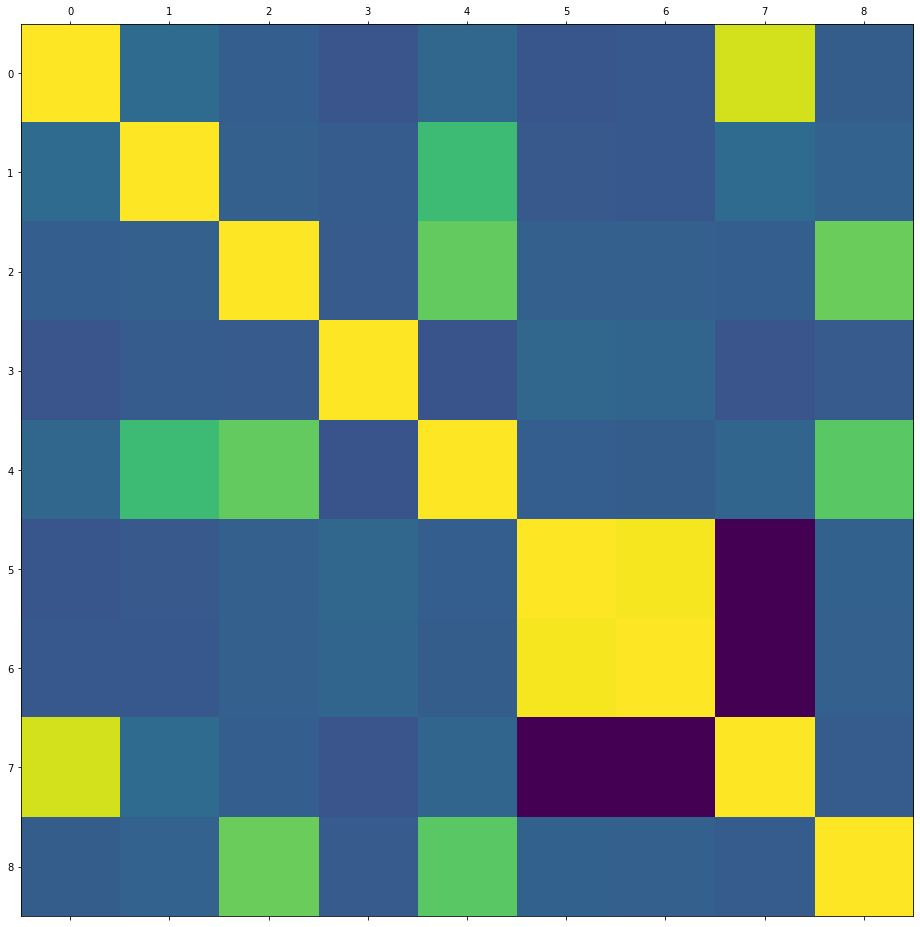

In [135]:
#show corelation matrix
plt.matshow(dataset.corr())
plt.show()

#### More Data Insights
* We dont have any duplicates.
* No missing values.
* We will look forward data quaterwise. Also Variable 'MONTH_ID' is highly correlated with QTR_ID (ρ = 0.9793). As a result 'MONTH_ID' should be ignored.
* We have 92 unique customers for which we will do RFM analysis

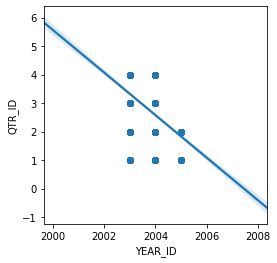

In [136]:
plt.rcParams['figure.figsize'] = [4,4]
sns.regplot(x='YEAR_ID', y='QTR_ID', data=dataset)
plt.show()

In [137]:
dataset['STATUS'].value_counts()

Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64

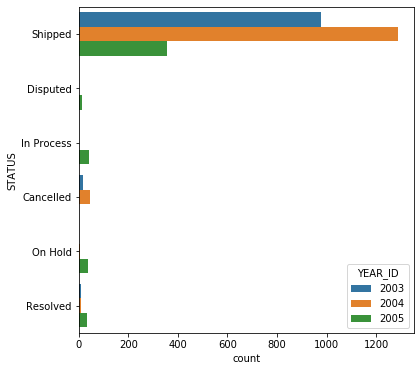

In [138]:
plt.rcParams['figure.figsize'] = [6,6]
sns.countplot(y='STATUS',data=dataset,hue='YEAR_ID')

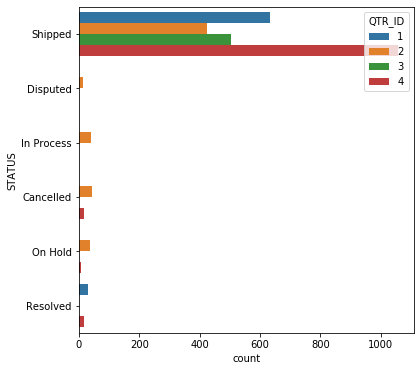

In [139]:
sns.countplot(y='STATUS',data=dataset,hue='QTR_ID')

#### Build the prediction model to predict Sales from the given data
* y (the target variable) is the total sales
* X is the relevant training data
* train test split with a test set of 0.2

In [140]:
from sklearn.model_selection import train_test_split

y = dataset['SALES']

In [141]:
X = dataset

In [142]:
print(X.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  PRODUCTLINE  MSRP  \
0   2/24/2003 0:00  Shipped       1         2     2003  Motorcycles    95   
1    5/7/2003 0:00  Shipped       2         5     2003  Motorcycles    95   
2    7/1/2003 0:00  Shipped       3         7     2003  Motorcycles    95   
3   8/25/2003 0:00  Shipped       3         8     2003  Motorcycles    95   
4  10/10/2003 0:00  Shipped       4        10     2003  Motorcycles    95   

               CUSTOMERNAME COUNTRY DEALSIZE PRODUCTINITIAL  
0         Land of Toys Inc.     USA    Sma

In [143]:
#Train test spit
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#have a look into the data in X so as to either 1-hot encode or convert to categorical data
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 16 columns):
ORDERNUMBER        2823 non-null int64
QUANTITYORDERED    2823 non-null int64
PRICEEACH          2823 non-null float64
ORDERLINENUMBER    2823 non-null int64
SALES              2823 non-null float64
ORDERDATE          2823 non-null object
STATUS             2823 non-null object
QTR_ID             2823 non-null int64
MONTH_ID           2823 non-null int64
YEAR_ID            2823 non-null int64
PRODUCTLINE        2823 non-null object
MSRP               2823 non-null int64
CUSTOMERNAME       2823 non-null object
COUNTRY            2823 non-null object
DEALSIZE           2823 non-null object
PRODUCTINITIAL     2823 non-null object
dtypes: float64(2), int64(7), object(7)
memory usage: 353.0+ KB


In [144]:
tmp =  ['ORDERDATE','CUSTOMERNAME','COUNTRY','SALES','ORDERNUMBER']

#drop date | we want our model to be independant of dates data so that we can confidently predict future sales
#drop country name and assume all orders come from one country as is the case in most instances
#drop customer name since this may not have significant influence on sales

X.drop(tmp, axis=1, inplace=True)

In [145]:
X['PRODUCTINITIAL'].value_counts()

S18    995
S24    731
S70    313
S12    259
S32    206
S10    161
S50    105
S72     53
Name: PRODUCTINITIAL, dtype: int64

#### ProductInitial can be converted to categorical

In [146]:
X['PRODUCTLINE'].value_counts()

Classic Cars        967
Vintage Cars        607
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: PRODUCTLINE, dtype: int64

In [147]:
X['DEALSIZE'].value_counts()

Medium    1384
Small     1282
Large      157
Name: DEALSIZE, dtype: int64

#### Deal Size, product line, product initial, status, can be converted to categorical
convert the features to numbers so that they can be fed in to the model since models do not tolerate string data

In [148]:
#encode categorical features
labelencoder_deal_size = LabelEncoder()
X['DEALSIZE'] = labelencoder_deal_size.fit_transform(X['DEALSIZE'])

labelencoder_product_line = LabelEncoder()
X['PRODUCTLINE'] = labelencoder_product_line.fit_transform(X['PRODUCTLINE'])

labelencoder_product_initial = LabelEncoder()
X['PRODUCTINITIAL'] = labelencoder_product_initial.fit_transform(X['PRODUCTINITIAL'])

labelencoder_status = LabelEncoder()
X['STATUS'] = labelencoder_status.fit_transform(X['STATUS'])

In [149]:
print(X.head())

   QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER  STATUS  QTR_ID  MONTH_ID  \
0               30      95.70                2       5       1         2   
1               34      81.35                5       5       2         5   
2               41      94.74                2       5       3         7   
3               45      83.26                6       5       3         8   
4               49     100.00               14       5       4        10   

   YEAR_ID  PRODUCTLINE  MSRP  DEALSIZE  PRODUCTINITIAL  
0     2003            1    95         2               0  
1     2003            1    95         2               0  
2     2003            1    95         1               0  
3     2003            1    95         1               0  
4     2003            1    95         1               0  


In [151]:
from sklearn.svm import SVR

#split in to training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#define the classifier
# classifier is a support vector regressor with a linear kernel
classifier = SVR(kernel='linear', C=1e3)

#train the classifier on the given data
classifier.fit(X_train,y_train)

#score the classifier
score = classifier.score(X_test,y_test)

print("Classifier Accuracy: ", score)

Classifier Accuracy:  0.8138610904606327


##### Classifier Results for the model, Assumptions and info on the project

* The model is a support vector regression model. Sciekit learn was chosen because it provides an easy way to try out several options and it is also mature as a platoform as evidenced by its widespread adoption
* The problem is a regresion problem since we want to predict the actual price and not the class as in classification
* Given the simplicity of the data, a simple linear regression model was used as opposed to other kernels for radial basis function or polynomial models. (all these are available in sklearn)

*based on the above information and rigorous EDA in this notebook, an accuracy score of 0.81 (81%) was achieved, which is pretty good for most practical purposes*